# Web Scraping: DataCamp's Projects Page

I like to use a web service called [DataCamp](https://app.datacamp.com/) to stay current on my data science skills, to learn new skills, and to build projects I can add to my portfolio here on Github. I also like to keep my `readme` files here on Github information rich and up-to-date with information about my projects. Having different folders and subfolders in my repository means I have a lot of `readme`'s to keep track of, leaving me vulnerable to making errors. So, I want to automate updating my `readme` files. To reduce this vulnerability.

As a first step in this automation, I want to make a list of all of DataCamp's projects and their associated metadata. Here is how the projects look on the DataCamp website:

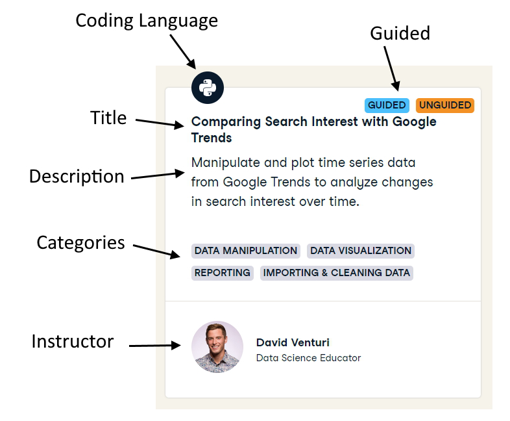

In [1]:
# Import the PIL mpackage for interacting with images
from PIL import Image

# Open the image I want to see
project_parts = Image.open('assets/project_parts.jpg')
# Resize it so it looks good
project_parts = project_parts.resize([int(project_parts.size[0] * 0.65), int(project_parts.size[1] * 0.65)])
# Show the image
display(project_parts)

As you can see, there are several pieces of information listed for each project. Specifically:
- `Language` (projects are offered in R, SQL, & python) 
- `Title`
- `Description`
- `Categories` 
- `Guided` (projects are offered at guided & unguided levels of instruction)

This is the information I want to tableize. Instructor information is also on there, but I'm not interested in that right now.

## Data Preparation
Typically, for a project like this I would use the `requests` package to grab the data I want from DataCamp's website. However, the projects page I want is behind a Google login page, and Google works hard to keep people from logging in with programming scripts. I could get around this by writing a script that pretends to be a little more human, but that's beyond the scope of this project. For now, I'll just download the web page and save it as an HTML file (`DC_projects.html`). 

I'm using `BeautifulSoup` to pull the HTML file into python so I can look at it. The code for the website is pretty long, so for convenience I'm only going to show part of it here.

In [2]:
# Import BeautifulSoup
from bs4 import BeautifulSoup

# Open HTML file and save the contents to a variable, 'soup'
with open('assets/DC_projects.html') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

# Print the first 5,000 characters of soup
print(str(soup)[:3000])

<body class="mfe-composer-body" data-nonce="0dbb68520daf7be8bc867d93652459e49a8426396d2497e2e70d3b95292adf28" id="mfe-composer-body"><main id="mfe-composer-layout"><div class="mfe-composer-layout-vertical"><div class="mfe-composer-layout-vertical__child" style="z-index:100"><div style="background-color:#ffffff;height:54px"><div id="single-spa-application:@dcmfe/mfe-app-atlas-header"><nav class="mfe-app-atlas-header-2ko6ad"><a aria-label="DataCamp" class="mfe-app-atlas-header-1ofhum0" data-testid="desktop-logo-nav" data-trackid="mfe-app-atlas-header-header-logo" href="/learn"><svg height="24" viewbox="0 0 173 36" xml:space="preserve" xmlns="http://www.w3.org/2000/svg"><path clip-rule="evenodd" d="M42.56 27.099a5.694 5.694 0 1 1 0-11.387 5.694 5.694 0 0 1 0 11.387zm5.704-20.622v8.853a8.335 8.335 0 1 0 0 12.149v1.835h2.632V6.477h-2.632zm73.28 20.622a5.694 5.694 0 1 1 0-11.387 5.694 5.694 0 0 1 0 11.387zm8.333-5.694v-8.246h-2.631v2.171a8.334 8.334 0 0 0-11.66.243 8.333 8.333 0 0 0 0 11.663

#### **Woe!** 
That's super hard to read. There are no line breaks or anything. Let's clean that up a little by `prettify`ing the code.

In [3]:
# Prettify the soup
print(soup.prettify()[:3000])

<body class="mfe-composer-body" data-nonce="0dbb68520daf7be8bc867d93652459e49a8426396d2497e2e70d3b95292adf28" id="mfe-composer-body">
 <main id="mfe-composer-layout">
  <div class="mfe-composer-layout-vertical">
   <div class="mfe-composer-layout-vertical__child" style="z-index:100">
    <div style="background-color:#ffffff;height:54px">
     <div id="single-spa-application:@dcmfe/mfe-app-atlas-header">
      <nav class="mfe-app-atlas-header-2ko6ad">
       <a aria-label="DataCamp" class="mfe-app-atlas-header-1ofhum0" data-testid="desktop-logo-nav" data-trackid="mfe-app-atlas-header-header-logo" href="/learn">
        <svg height="24" viewbox="0 0 173 36" xml:space="preserve" xmlns="http://www.w3.org/2000/svg">
         <path clip-rule="evenodd" d="M42.56 27.099a5.694 5.694 0 1 1 0-11.387 5.694 5.694 0 0 1 0 11.387zm5.704-20.622v8.853a8.335 8.335 0 1 0 0 12.149v1.835h2.632V6.477h-2.632zm73.28 20.622a5.694 5.694 0 1 1 0-11.387 5.694 5.694 0 0 1 0 11.387zm8.333-5.694v-8.246h-2.631v2.171a

#### **Much better!**  
I don't know if you read HTML or not, but now I can read that and actually pick out the information I want. For example, if I want to look at the code for the project pictured above (`Comparing Search Interest with Google Trends`), I can do this:

In [4]:
# Class label for a project
project_class = "mfe-app-learn-hub-5p9qxy"
project_title = 'Comparing Search Interest with Google Trends'

# Find and look through all projects for the one I want
for el in soup.find_all('div', {'class': project_class}):
    if project_title in el.prettify():
        project_code = el
        print(el.prettify())

<div class="mfe-app-learn-hub-5p9qxy">
 <div class="mfe-app-learn-hub-datzm4">
  <svg class="mfe-app-learn-hub-1oaeivz" height="40" role="img" viewbox="0 0 39 39" width="40">
   <title>
    Python
   </title>
   <g fill="none" fill-rule="evenodd">
    <circle cx="19.5" cy="19.5" fill="#05192D" r="19.5">
    </circle>
    <path d="M26.849 14.552c1.432 0 2.107 1.055 2.46 2.457.492 1.948.514 3.408 0 4.926-.497 1.474-1.03 2.457-2.46 2.457h-7.376v.615h4.915v1.847c0 1.399-1.221 2.11-2.46 2.463-1.864.533-3.358.451-4.915 0-1.301-.377-2.46-1.15-2.46-2.463V22.24c0-1.328 1.113-2.463 2.46-2.463h4.915c1.638 0 3.074-1.404 3.074-3.073v-2.152zm-5.166 11.351a1.018 1.018 0 101.018 1.015c0-.561-.455-1.015-1.018-1.015zm-2.27-16.59a15.51 15.51 0 012.57.2c1.337.22 2.465 1.215 2.465 2.538v4.65a2.472 2.472 0 01-2.466 2.482h-4.925c-1.672 0-3.08 1.422-3.08 3.033v2.232H12.28c-1.433 0-2.27-1.03-2.62-2.476-.473-1.942-.453-3.103 0-4.963.392-1.623 1.647-2.476 3.08-2.476h6.782v-.62h-4.931V12.05c0-1.409.378-2.173 2.46

**Now, there are still a lot of lines of code in there, so I'll still have to pick out what I want.**  

## Coding Languages  
DataCamp offers projects in three coding languages: SQL, python, and R. I can pick out what language a specific project is offered in by looking at the section of code shown bellow:

In [5]:
# Import package for adding color to script
from colorama import Back, Style

# Define the custom class for language
language_class = "mfe-app-learn-hub-1oaeivz"

# Grab the code associated with displaying the language and print it out
string = project_code.find('svg', {'class': language_class}).prettify()
text_to_bold = string[94:121]
string = string.replace(text_to_bold, Back.YELLOW + text_to_bold + Style.RESET_ALL)
print(string)

<svg class="mfe-app-learn-hub-1oaeivz" height="40" role="img" viewbox="0 0 39 39" width="40">
 <title>
  Python
 </title>
 <g fill="none" fill-rule="evenodd">
  <circle cx="19.5" cy="19.5" fill="#05192D" r="19.5">
  </circle>
  <path d="M26.849 14.552c1.432 0 2.107 1.055 2.46 2.457.492 1.948.514 3.408 0 4.926-.497 1.474-1.03 2.457-2.46 2.457h-7.376v.615h4.915v1.847c0 1.399-1.221 2.11-2.46 2.463-1.864.533-3.358.451-4.915 0-1.301-.377-2.46-1.15-2.46-2.463V22.24c0-1.328 1.113-2.463 2.46-2.463h4.915c1.638 0 3.074-1.404 3.074-3.073v-2.152zm-5.166 11.351a1.018 1.018 0 101.018 1.015c0-.561-.455-1.015-1.018-1.015zm-2.27-16.59a15.51 15.51 0 012.57.2c1.337.22 2.465 1.215 2.465 2.538v4.65a2.472 2.472 0 01-2.466 2.482h-4.925c-1.672 0-3.08 1.422-3.08 3.033v2.232H12.28c-1.433 0-2.27-1.03-2.62-2.476-.473-1.942-.453-3.103 0-4.963.392-1.623 1.647-2.476 3.08-2.476h6.782v-.62h-4.931V12.05c0-1.409.378-2.173 2.465-2.538a14.217 14.217 0 012.356-.2zm-2.678 1.747a1.02 1.02 0 00-1.019 1.021c0 .562.456 1.016 1.

Now, most of that is just formatting. DataCamp likes to highlight their language offerings with circles. But, the part I care about is the part that's highlighted in yellow. Interestingly, whoever built this website decided to call the language "title" instead of the actual title of the project. Sorry if this is confusing. But, this is the only part of the project called a title, so I can pick out the language fairly easily by using the following code:

In [6]:
# Extract the project language
language = [title.text for title in project_code.find_all('title')]
print(language)

['Python']


And it's a match! The text highlighted in yellow says 'Python', and so does the value I found with my code. The reason it is in brackets is because this is a list, which right now only contains 1 value, but for some projects will contain more (e.g. when a project is offered in both `python` and `R`).

## Title
Now let's move onto the title, which of course is not called title in the code. So what is it called? I could try to dig through the raw  code to figure this out, but most of the time, data scientists use the `inspect` tool in their web browser for things like this. I'll show you a picture of what the `inspect` tool looks like in Chrome: 

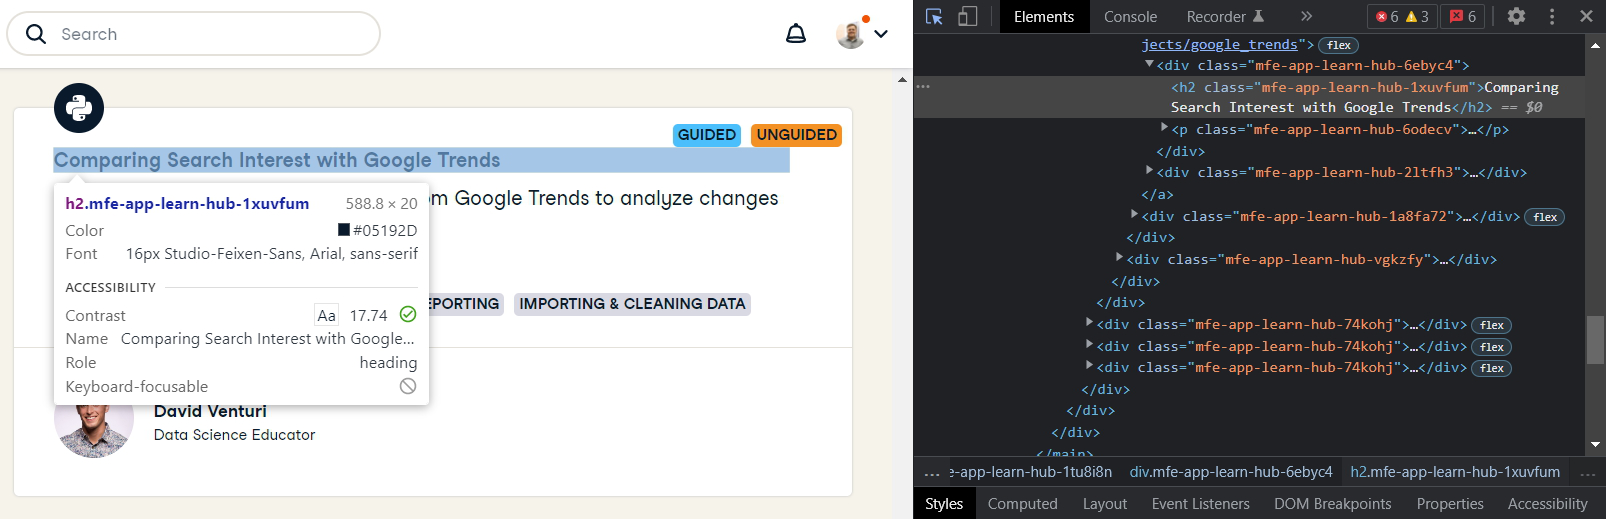

In [7]:
# Open and display the inspect image
inspect = Image.open('assets/inspect.jpg')
display(inspect)

I won't get to far into `inspect`, but with it, I can simply click on the title and find that it has a `class` of `mfe-app-learn-hub-1xuvfum`. I have no idea why this is the `class` for the title. Different companies often have very unique (but also often very purposeful) `class` names, which are usually indiscernible to anyone outside of the company (or the IT team). Either way, we can use this `class` to pull out our project's title using BeautifulSoup, like so:

In [8]:
# Define the custom class for title
title_class = "mfe-app-learn-hub-1xuvfum"

# Extract and print the title
title = project_code.find('h2', {'class': title_class}).text
print(title)

Comparing Search Interest with Google Trends


***Woohoo!!*** I got the title I wanted.

## Description
In the same way as I found the title's `class`, I also found the description's `class`, which is `mfe-app-learn-hub-6odecv`. Again, I have no idea why this is the description `class`, but I can use it to pull out the project's description.

In [9]:
# Define the custom class for the project description
description_class = "mfe-app-learn-hub-6odecv"

# Extract and print the description
description = project_code.find('p', {'class': description_class}).text
description = description.replace('\n', '')
print(description)

Manipulate and plot time series data from Google Trends to analyze changes in search interest over time.


## Categories
Next, I can grab the project categories using the category `class`, `mfe-app-learn-hub-z3y4rp`.

In [10]:
# Define the custom class for categories
category_class = "mfe-app-learn-hub-z3y4rp"

# Extract and print the categories
categories = [class_tag.text for class_tag in project_code.find_all('strong', {'class': category_class})]
print(categories)

['Data Manipulation', 'Data Visualization', 'Reporting', 'Importing & Cleaning Data']


I now have the categories. Notice that the categories are in a list (bracketed), which is fine for my purposes.

## Guided / Unguided
The last bit of information to grab is whether `guided` and `unguided` versions of the project are offered. Sometimes, a project is only offered as either `guided` or `unguided`, or sometimes it can be offered as both. And each of these offering types is listed as an individual `class` in the HTML. So, for each project I will have to see if the class for each option is present. 

In [11]:
# Define the custom classes for guided/unguided
guided_class = "mfe-app-learn-hub-1oucvfp"
unguided_class = "mfe-app-learn-hub-6u10gy"

guided_list = []
if project_code.find('strong', {'class': guided_class}):
    guided_list.append('guided') 
if project_code.find('strong', {'class': unguided_class}):
    unguided = guided_list.append('unguided')
print(guided_list)

['guided', 'unguided']


Looks like for this project there is both a `guided` and an `unguided` option.

## Gathering Data for All of the DataCamp Projects
Now that I know how to extract the information I want, I will go through each of the projects one by one, extract their meta data, and then use `pandas` to put all of the meta data into a single table, referred to as a `DataFrame`.

In [12]:
project_data = [] # an empty list for storing information on the different projects

# Go through each project
for el in soup.find_all('div', {'class': project_class}):
    # Extract the meta data of interest
    language = [title.text for title in el.find_all('title')]
    
    title = el.find('h2', {'class': title_class}).text
    # Replace some special characters that translate poorly between HTML & python
    title = title.replace('Ã©', 'e')
    title = title.replace('Ã¯', 'i')
    
    description = el.find('p', {'class': description_class}).text
    description = description.replace('\n', '')
    
    categories = [class_tag.text for class_tag in el.find_all('strong', {'class': category_class})]
    
    guided_list = []
    if el.find('strong', {'class': guided_class}):
        guided_list.append('guided') 
    if el.find('strong', {'class': unguided_class}):
        unguided = guided_list.append('unguided')     
    
    # Add the meta data to the empty list as a data dictionary
    project_data.append({
        'language': language,
        'title': title,
        'description': description,
        'categories': categories,
        'guided': guided_list,
        'completed': 0
    })

# Import pandas and use it to convert the list to a dataframe
import pandas as pd
DataCampProjects = pd.DataFrame(project_data)
DataCampProjects

,language,title,description,categories,guided,completed
0,[Python],The Hottest Topics in Machine Learning,Use Natural Language Processing on NIPS papers...,"[Data Manipulation, Data Visualization, Machin...",[guided],0
1,[SQL],Analyzing Unicorn Companies,Use skills gained in Intermediate SQL to find ...,"[Importing & Cleaning Data, Case Studies]",[unguided],0
2,[SQL],Analyze International Debt Statistics,Write SQL queries to answer interesting questi...,"[Data Manipulation, Importing & Cleaning Data]",[guided],0
3,[SQL],Analyzing NYC Public School Test Result Scores,Use summary statistics and filters to analyze ...,"[Data Manipulation, Programming]",[guided],0
4,[SQL],Optimizing Online Sports Retail Revenue,Analyze product data for an online sports reta...,[Data Manipulation],[guided],0
...,...,...,...,...,...,...
79,[R],Functions for Food Price Forecasts,Write functions to forecast time series of foo...,"[Data Manipulation, Data Visualization, Import...","[guided, unguided]",0
80,[Python],Comparing Search Interest with Google Trends,Manipulate and plot time series data from Goog...,"[Data Manipulation, Data Visualization, Report...","[guided, unguided]",0
81,[Python],Analyzing TV Data,Use data manipulation and visualization to exp...,"[Data Manipulation, Data Visualization, Import...",[guided],0
82,[R],"TV, Halftime Shows, and the Big Game","Load, clean, and explore Super Bowl data in th...","[Data Manipulation, Data Visualization, Import...",[guided],0


Great! I now have all of the data I want, and in the format I want.  
<br><strong>But wait!</strong>  
There's a problem. If I mark a project as complete, how will I know if that's the `R` version or the `python` version I completed. For that matter, how will I know if it's the `guided` or the `unguided` version. I need a separate row for each individual offering, broken down by language and whether it is guided or not. I could write my own code to do this, but fortunately, `pandas` comes with the `explode` method, which can make the individual rows I want for me.  
<img src="assets/explosion.png" alt="explosion" width=30%/>

In [13]:
# Explode the 'language' column
DataCampProjects = DataCampProjects.explode('language')

# Explode the 'guided' column
DataCampProjects = DataCampProjects.explode('guided')

# Reset the indeces (for book keeping purposes)
DataCampProjects.reset_index(drop=True, inplace=True)
DataCampProjects

,language,title,description,categories,guided,completed
0,Python,The Hottest Topics in Machine Learning,Use Natural Language Processing on NIPS papers...,"[Data Manipulation, Data Visualization, Machin...",guided,0
1,SQL,Analyzing Unicorn Companies,Use skills gained in Intermediate SQL to find ...,"[Importing & Cleaning Data, Case Studies]",unguided,0
2,SQL,Analyze International Debt Statistics,Write SQL queries to answer interesting questi...,"[Data Manipulation, Importing & Cleaning Data]",guided,0
3,SQL,Analyzing NYC Public School Test Result Scores,Use summary statistics and filters to analyze ...,"[Data Manipulation, Programming]",guided,0
4,SQL,Optimizing Online Sports Retail Revenue,Analyze product data for an online sports reta...,[Data Manipulation],guided,0
...,...,...,...,...,...,...
101,R,"TV, Halftime Shows, and the Big Game","Load, clean, and explore Super Bowl data in th...","[Data Manipulation, Data Visualization, Import...",guided,0
102,R,Exploring the NYC Airbnb Market,Apply data importing and cleaning skills to ex...,"[Data Manipulation, Importing & Cleaning Data]",guided,0
103,R,Exploring the NYC Airbnb Market,Apply data importing and cleaning skills to ex...,"[Data Manipulation, Importing & Cleaning Data]",unguided,0
104,Python,Exploring the NYC Airbnb Market,Apply data importing and cleaning skills to ex...,"[Data Manipulation, Importing & Cleaning Data]",guided,0


**Perfect!**  
This thing looks the way I want it to be. I'll export it now to my assets folder. 

In [14]:
DataCampProjects.to_csv('./assets/DataCampProjects.csv')

# Success!!!